## Basic Data Loading

In [1]:
import os,lasio

In [2]:
inputpath = "Input"
extension = ".las"
lasfiles = [os.path.join(inputpath,file)
            for file in os.listdir(inputpath)
            if file.endswith(extension)]
lasiofiles = [lasio.read(lasfile) for lasfile in lasfiles]

Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.


In [3]:
lasiofiles[0].header

{'Version': [HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS LOG ASCII STANDARD - ...),
  HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=SINGLE LINE PER DEPTH STEP),
  HeaderItem(mnemonic=CREA, unit=, value=22-Apr-17 8, descr=58:52 AM)],
 'Well': [HeaderItem(mnemonic=STRT, unit=M, value=0.0, descr=START DEPTH),
  HeaderItem(mnemonic=STOP, unit=M, value=3300.984, descr=STOP DEPTH),
  HeaderItem(mnemonic=STEP, unit=M, value=0.1524, descr=STEP VALUE),
  HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=NULL VALUE),
  HeaderItem(mnemonic=DATE, unit=, value=22-Apr-17, descr=LAS file Creation Date),
  HeaderItem(mnemonic=WELL, unit=, value=Haselgrove 1, descr=Well Name),
  HeaderItem(mnemonic=UWI, unit=, value=Haselgrove 001, descr=Unique Well Iden...),
  HeaderItem(mnemonic=COMP, unit=, value=SAGASCO, descr=Company),
  HeaderItem(mnemonic=STATE, unit=, value=SA, descr=State),
  HeaderItem(mnemonic=COUNT, unit=, value=AUSTRALIA, descr=Country),
  HeaderItem(mnemonic=API, unit=, 

In [4]:
for lasiofile in lasiofiles:
    print(f"Wellname: {lasiofile.sections['Well'].well.value}, \nX: {lasiofile.sections['Well'].LONG.value}, Y: {lasiofile.sections['Well'].LATI.value}\nGDAT: {lasiofile.sections['Well'].GDAT.value}\n")


Wellname: Haselgrove 1, 
X: 485127.52, Y: 5856251.24
GDAT: GDA94 Zone 54

Wellname: Haselgrove 2, 
X: 486382.95, Y: 5855360.38
GDAT: GDA94 Zone 54

Wellname: Haselgrove South 1 DW1, 
X: 487121.39, Y: 5855123.03
GDAT: GDA94 Zone 54

Wellname: Haselgrove South 1, 
X: 487121.39, Y: 5855123.03
GDAT: GDA94 Zone 54

Wellname: Haselgrove South 2, 
X: 489182.9, Y: 5854036.6
GDAT: GDA94 Zone 54

Wellname: Jolly 1 ST1, 
X: 486589.85, Y: 5860639.0
GDAT: GDA94 Zone 54

Wellname: Jolly 1, 
X: 486589.85, Y: 5860639.0
GDAT: GDA94 Zone 54

Wellname: Pyrus 1, 
X: 482609.81, Y: 5859617.34
GDAT: GDA94 Zone 54

Wellname: Wynn 1, 
X: 488809.92, Y: 5859891.7
GDAT: GDA94 Zone 54

Wellname: Wynn 2, 
X: 489424.08, Y: 5859481.37
GDAT: GDA94 Zone 54



In [5]:
H1 = lasiofiles[0]
H1_DF = H1.df()
H1_DF.columns

Index(['CALI', 'DRHO', 'DT', 'GR', 'MINV', 'MNOR', 'NPHI', 'PEF', 'RDEP',
       'RHOB', 'RMED', 'RMIC', 'SP'],
      dtype='object')

In [6]:
H1_DF.iloc[:10]

,CALI,DRHO,DT,GR,MINV,MNOR,NPHI,PEF,RDEP,RHOB,RMED,RMIC,SP
DEPTH,,,,,,,,,,,,,
0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1524,NaN,NaN,NaN,28.5469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3048,NaN,NaN,NaN,28.5469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4572,NaN,NaN,NaN,28.5469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6096,NaN,NaN,NaN,28.5469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.7620,NaN,NaN,NaN,28.5469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9144,NaN,NaN,NaN,28.5469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0668,NaN,NaN,NaN,28.5469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.2192,NaN,NaN,NaN,28.5469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Basic Visualization

In [7]:
H1_DF = H1_DF.dropna()
H1_DF = H1_DF.iloc[:100]
H1_DF = H1_DF.reset_index()

In [8]:
H1_DF.head()

,DEPTH,CALI,DRHO,DT,GR,MINV,MNOR,NPHI,PEF,RDEP,RHOB,RMED,RMIC,SP
0,2697.7848,10.0703,-0.0067,82.3,125.6250,0.5358,0.9542,0.2030,3.6855,6.1593,2.5735,6.1589,1.0496,-62.5313
1,2697.9372,10.3359,0.0010,82.5,122.1250,0.3859,0.6957,0.2219,3.9180,6.4759,2.5367,6.4405,4.1982,-62.5625
2,2698.0896,10.5234,0.0087,81.2,120.6875,0.4194,0.8049,0.2203,3.9961,6.5576,2.3439,6.5015,9.0576,-62.4688
3,2698.2420,10.6641,0.0411,80.1,117.7500,0.5245,1.0054,0.2202,3.6426,6.7014,2.2304,6.6941,2.0835,-62.0000
4,2698.3944,9.8359,0.0772,79.6,115.1250,1.0094,2.0405,0.2184,3.4688,7.2564,2.1779,7.2231,2.8257,-62.3438


In [9]:
%matplotlib inline
import pandas as pd

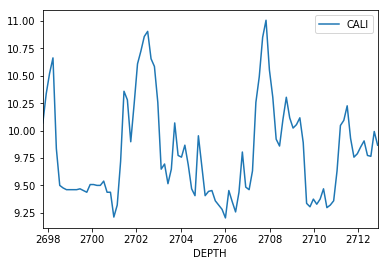

In [10]:
H1_DF.plot(x='DEPTH',y='CALI')